# PCA
Principal Component Analysis (PCA) is a technique that reorganizes data along orthogonal axes (principal components (PC)) from most to least significant, preserving as much variance as possible.

As a side effect it is often used to reduce dimensionality (1) reorganize data on a new set of axes from most to least significant (2) throw away everything above a threshold of variance, or above N-dimensions. Here we will use it to throw away most of the dimensions of embeddings vectors so we can plot them on a 2D graph.

## Toy implementation
Rough outline:
1) scale the data so each dimensions is in the same range
2) center the data on 0 (shift all the values around the `mean()`)
3) fit a line from the origin `(0, 0)` through the data that minimize the squared sum of the projections (of our datapoints into said line)
4) create a perpendicular axis to it following the same properties until all dimensions are covered

Note: Steps (1) and (2) combined are equivalent to normalizing each axis to a Gaussian. Which reminds me of the [BatchNorm from the Karpathy's course](https://youtu.be/P6sfmUTpUmc?t=2454)

In [91]:
import torch
import math
import matplotlib.pyplot as plt
%matplotlib inline

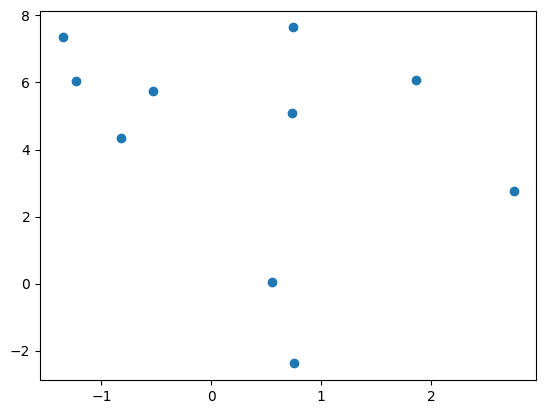

In [197]:
# imagine a dataset 2 dimensional embeddings (x, y)
# x = torch.tensor([[1, 11], [2, 24], [3, 29]]).float()
x = torch.randn(20).view(-1, 2)
# x[:, 1] = (x[:, 1] * 3 + 30)**2
x[:, 1] = x[:, 1] * 3 + 3
plt.scatter(x[:, 0], x[:, 1])

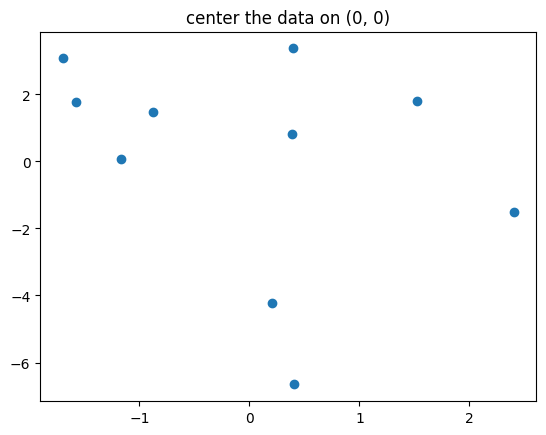

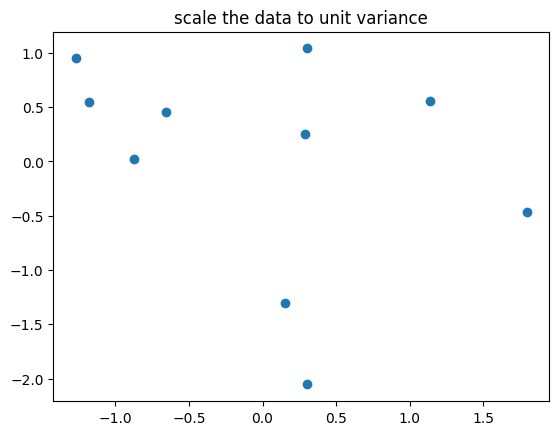

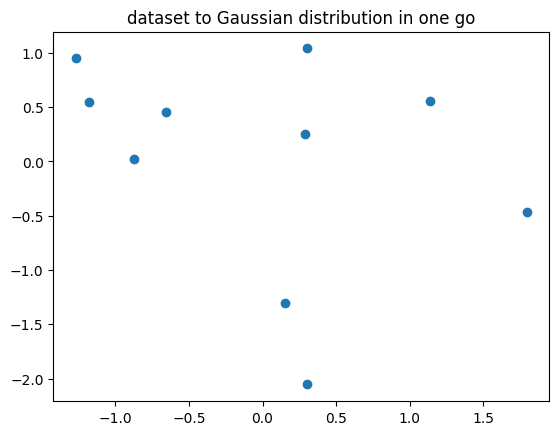

In [198]:
# normalize the data to a Gaussian distribution step by step
xx = x.clone()

# step 1: center the data on to (0, 0)
xx -= xx.mean(0, keepdim=True)
plt.scatter(xx[:, 0], xx[:, 1])
plt.title('center the data on (0, 0)')
plt.show()

# step 2: scale the data to unit variance
xx /= (1e-8 + xx.std(0, keepdim=True)) # adding an epsilon to avoid dividing by zero
plt.scatter(xx[:, 0], xx[:, 1])
plt.title('scale the data to unit variance')
plt.show()

# step 1 + 2: center and scale the data
normalized_x = (x - x.mean(0, keepdim=True)) / (1e-8 + x.std(0, keepdim=True)) # adding an epsilon to avoid dividing by zero
plt.scatter(normalized_x[:, 0], normalized_x[:, 1])
plt.title('dataset to Gaussian distribution in one go')
plt.show()

[(0, '5.0878'), (1, '5.1220'), (2, '5.1604'), (3, '5.2029'), (4, '5.2497'), (5, '5.3005'), (6, '5.3553'), (7, '5.4141'), (8, '5.4768'), (9, '5.5433'), (10, '5.6135'), (11, '5.6874'), (12, '5.7648'), (13, '5.8456'), (14, '5.9299'), (15, '6.0174'), (16, '6.1080'), (17, '6.2017'), (18, '6.2983'), (19, '6.3977'), (20, '6.4998'), (21, '6.6044'), (22, '6.7115'), (23, '6.8209'), (24, '6.9325'), (25, '7.0461'), (26, '7.1615'), (27, '7.2788'), (28, '7.3977'), (29, '7.5180'), (30, '7.6396'), (31, '7.7625'), (32, '7.8863'), (33, '8.0110'), (34, '8.1365'), (35, '8.2625'), (36, '8.3889'), (37, '8.5156'), (38, '8.6424'), (39, '8.7691'), (40, '8.8957'), (41, '9.0219'), (42, '9.1475'), (43, '9.2726'), (44, '9.3968'), (45, '9.5200'), (46, '9.6421'), (47, '9.7629'), (48, '9.8824'), (49, '10.0002'), (50, '10.1164'), (51, '10.2307'), (52, '10.3431'), (53, '10.4533'), (54, '10.5612'), (55, '10.6668'), (56, '10.7699'), (57, '10.8703'), (58, '10.9680'), (59, '11.0627'), (60, '11.1545'), (61, '11.2432'), (62,

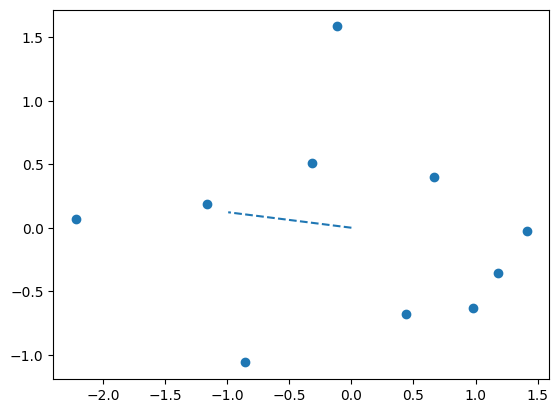

In [249]:
# fit a line through the data

# /!\ this is for demo purpose only
# iterate over all (~not really but shush~) possible angles

# x = torch.randn(20).view(-1, 2)
# normalized_x = (x - x.mean(0, keepdim=True)) / (1e-8 + x.std(0, keepdim=True)) # adding an epsilon to avoid dividing by zero

outs = []

mini = float('inf')
best_angle = 0
for i in range(180):
    sum_of_squared_distances = 0
    angle = math.radians(i)
    slope = torch.tensor([math.cos(angle), math.sin(angle)])
    for point in normalized_x:
        projection = (point.dot(slope) / slope.dot(slope)) * slope
        squated_distance = (point - projection).pow(2).sum()
        sum_of_squared_distances += squated_distance
        # print(f'  {i}°: {squated_distance}')
    # print(f'{i}°: {sum_of_squared_distances}')
    outs.append((i, f'{sum_of_squared_distances.item():.4f}'))
    if sum_of_squared_distances < mini:
        mini = sum_of_squared_distances
        best_angle = i

print(outs)
print(f'angle {best_angle}° minimizes the sum of squared distances: {mini}')
plt.scatter(normalized_x[:, 0], normalized_x[:, 1])
x_line = torch.linspace(0, math.cos(math.radians(best_angle)), 2)  # Adjust the range as needed
y_line = torch.linspace(0, math.sin(math.radians(best_angle)), 2)
plt.plot(x_line, y_line , linestyle='--') #, color='blue')plt.title('dataset to Gaussian distribution in one go')
plt.show()

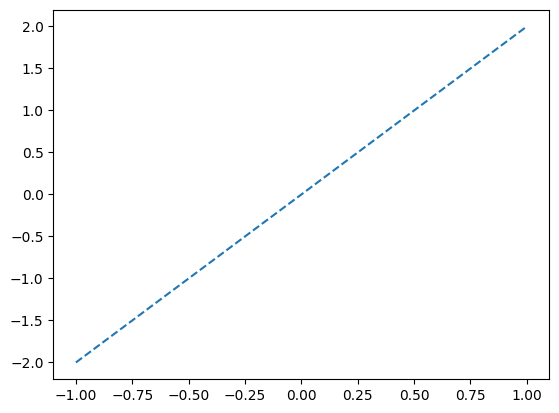

In [90]:
x_line = torch.linspace(-1, 1, 2)  # Adjust the range as needed
y_line = 2 * x_line
plt.plot(x_line, y_line , linestyle='--') #, color='blue')

# plt.show()

In [370]:
# just a helper to plot a line that fit nicely in the plot
def plot_line(plt, angle):
    ar = math.radians(angle)
    v = torch.tensor([math.cos(ar), math.sin(ar)])
    x_min, x_max, y_min, y_max = plt.axis()
    diag = torch.tensor([x_max - x_min, y_max - y_min]).norm()
    v *= diag / 2.
    plt.plot([-v[0], v[0]], [-v[1], v[1]], linestyle='--', color='red', label=f'Angle: {angle}°')

angle 149° minimizes the sum of squared distances: 2.94229793548584


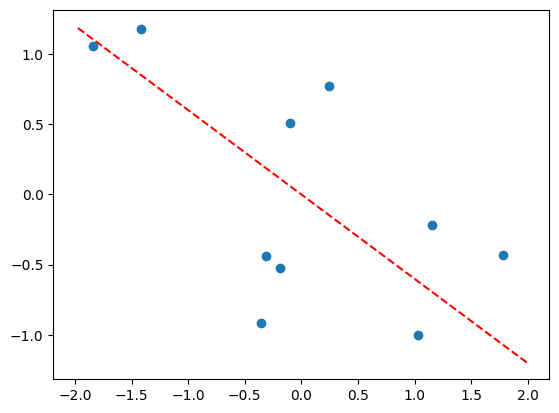

torch.return_types.max(
values=tensor([1.7814, 1.1781]),
indices=tensor([5, 6]))

In [369]:
import torch
import math

x = torch.randn(20).view(-1, 2)
normalized_x = (x - x.mean(0, keepdim=True))

mini = float('inf')
best_angle = 0

# Set the angle step size for exploration
angle_step = 1  # You can adjust this as needed for finer or coarser steps

for i in range(0, 180, angle_step):  # Explore all angles from 0 to 179 degrees
    sum_of_squared_distances = 0
    angle = math.radians(i)
    slope = torch.tensor([math.cos(angle), math.sin(angle)])
    for point in normalized_x:
        projection = (point.dot(slope) / slope.dot(slope)) * slope
        squared_distance = (point - projection).pow(2).sum()
        sum_of_squared_distances += squared_distance
    if sum_of_squared_distances < mini:
        mini = sum_of_squared_distances
        best_angle = i

print(f'angle {best_angle}° minimizes the sum of squared distances: {mini}')
plt.scatter(normalized_x[:, 0], normalized_x[:, 1])
plot_line(plt, best_angle)
plt.show()

normalized_x.max(dim=0)